In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
# Load dataset
file_path = 'produksiPadi.xlsx'
data = pd.read_excel(file_path, sheet_name='data training')
# Clean up and use only relevant columns
data = data[['Tahun', 'Produksi Padi(Ton)']].dropna()
data.columns = ['Year', 'Rice_Production']
data.head()


,Year,Rice_Production
0,1970,18693649.0
1,1971,20483687.0
2,1972,19393933.0
3,1973,21490578.0
4,1974,22476073.0


In [5]:
# Create lagging features
data['Lag_1'] = data['Rice_Production'].shift(1)
data['Lag_2'] = data['Rice_Production'].shift(2)
data = data.dropna()
data.head()


,Year,Rice_Production,Lag_1,Lag_2
2,1972,19393933.0,20483687.0,18693649.0
3,1973,21490578.0,19393933.0,20483687.0
4,1974,22476073.0,21490578.0,19393933.0
5,1975,22339455.0,22476073.0,21490578.0
6,1976,23300939.0,22339455.0,22476073.0


In [6]:
from sklearn.model_selection import train_test_split

# Split data into features (X) and target (y)
X = data[['Lag_1', 'Lag_2']]
y = data['Rice_Production']
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape


((35, 2), (16, 2))

In [7]:
from sklearn.linear_model import LinearRegression

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Display model coefficients
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)


Intercept: 279647.160991922
Coefficients: [ 1.1617607  -0.15076943]


In [8]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 37419072103668.56
R-squared: 0.8391187640504247


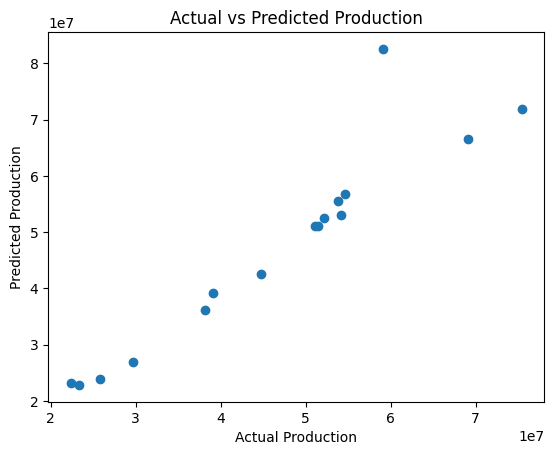

In [9]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Production')
plt.ylabel('Predicted Production')
plt.title('Actual vs Predicted Production')
plt.show()


In [11]:
import pandas as pd

# Data terakhir untuk prediksi (2021 dan 2022)
last_years_data = data.tail(2)  # Ambil dua baris terakhir
lag_1 = last_years_data.iloc[-1]['Rice_Production']  # 2022
lag_2 = last_years_data.iloc[-2]['Rice_Production']  # 2021

# Prediksi untuk 2023
pred_2023_input = pd.DataFrame([[lag_1, lag_2]], columns=['Lag_1', 'Lag_2'])
pred_2023 = model.predict(pred_2023_input)[0]
print(f'Predicted Production for 2023: {pred_2023:.2f} tons')

# Update lagging values for 2024 prediction
lag_1_2024 = pred_2023  # 2023 prediksi menjadi Lag_1 untuk 2024
lag_2_2024 = lag_1  # 2022 menjadi Lag_2 untuk 2024

# Prediksi untuk 2024
pred_2024_input = pd.DataFrame([[lag_1_2024, lag_2_2024]], columns=['Lag_1', 'Lag_2'])
pred_2024 = model.predict(pred_2024_input)[0]
print(f'Predicted Production for 2024: {pred_2024:.2f} tons')


Predicted Production for 2023: 55296084.12 tons
Predicted Production for 2024: 56327893.57 tons
